In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv = r'.\data\ping_results.csv'
df = pd.read_csv(csv)
df['Server'] = df.Host.str.split('-').str[1].astype('int')
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [2]:
len(df)

30557

In [3]:
df.head(10)

,Year,Month,Day,Hour,Host,Latency(ms),TTL,Server,Date
0,2019,3,7,15,ILMOCOP3CT08-16,79,123,16,2019-03-07
1,2019,3,7,15,ILMOCOP3CT08-16,85,123,16,2019-03-07
2,2019,3,7,15,ILMOCOP3CT08-16,68,123,16,2019-03-07
3,2019,3,7,15,ILMOCOP3CT08-16,71,123,16,2019-03-07
4,2019,3,7,15,ILMOCOP3CT08-16,129,123,16,2019-03-07
5,2019,3,7,15,ILMOCOP3CT08-16,134,123,16,2019-03-07
6,2019,3,7,15,ILMOCOP3CT08-16,93,123,16,2019-03-07
7,2019,3,7,15,ILMOCOP3CT08-16,133,123,16,2019-03-07
8,2019,3,7,15,ILMOCOP3CT08-16,131,123,16,2019-03-07
9,2019,3,7,15,ILMOCOP3CT08-16,145,123,16,2019-03-07


In [4]:
def plot_latency(df, group):
    plt.figure(figsize=(14, 8))
    plt.fontsize = 14
    width = 4.0
    avg_latency = df[['Latency(ms)', group]].groupby(group).mean()
    min_latency = df[['Latency(ms)', group]].groupby(group).min()
    max_latency = df[['Latency(ms)', group]].groupby(group).max()
    plt.plot(avg_latency, label='Average Case', linewidth=width)
    plt.plot(min_latency, label='Best Case', linewidth=width)
    plt.plot(max_latency, label='Worst Case', linewidth=width)
    
    plt.title('EGIS Server Performance by {}'.format(group), fontsize=16)
    plt.ylabel('Latency (ms)', fontsize=16)   
    plt.xlabel('{}'.format(group), fontsize=16)
    
    plt.legend(fontsize=16)
    plt.show()

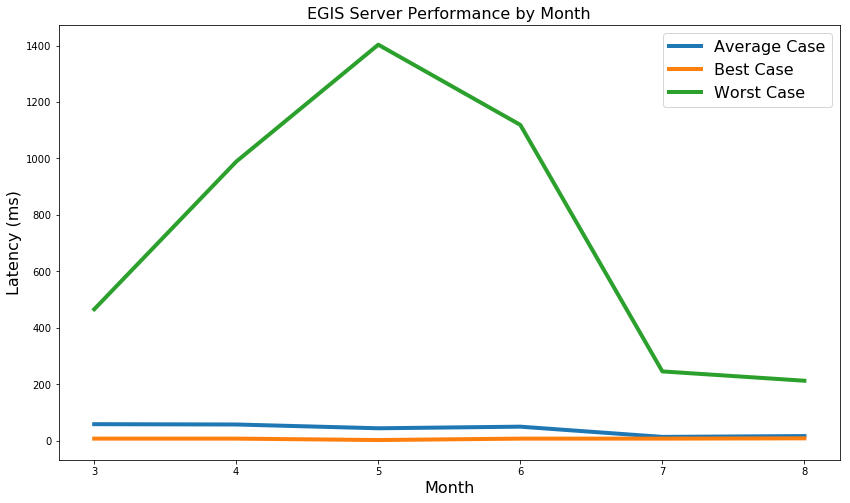

In [5]:
plot_latency(df, 'Month')

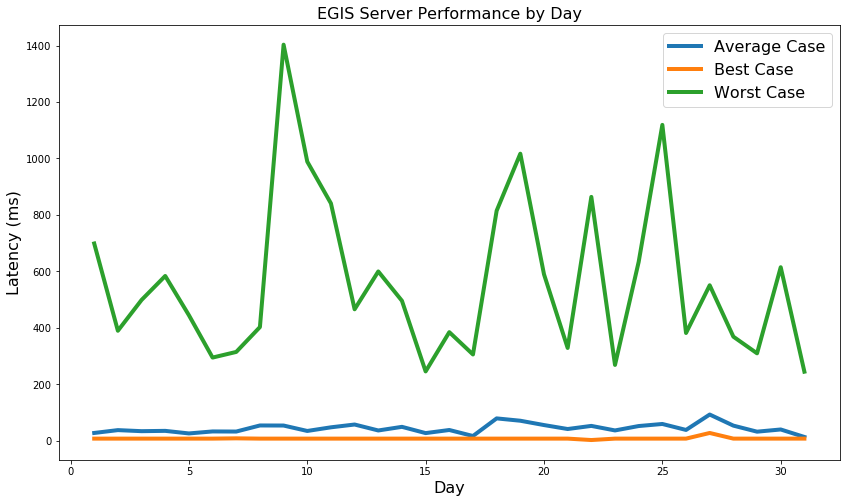

In [6]:
plot_latency(df, 'Day')

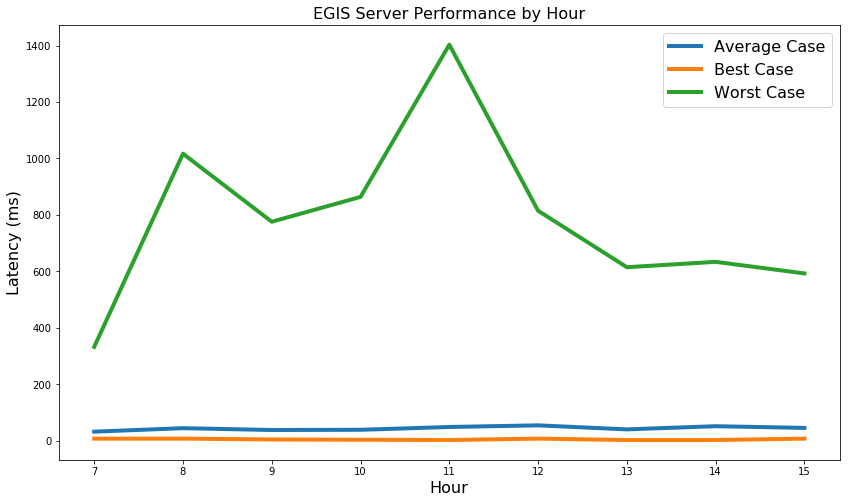

In [7]:
plot_latency(df, 'Hour')

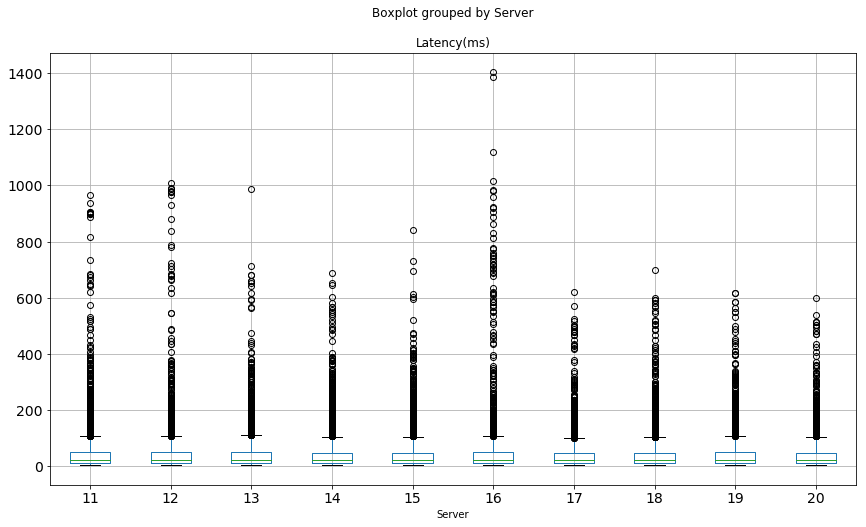

In [8]:
ax = df.boxplot(column='Latency(ms)', by='Server', figsize=(14, 8), fontsize=14)
plt.show()

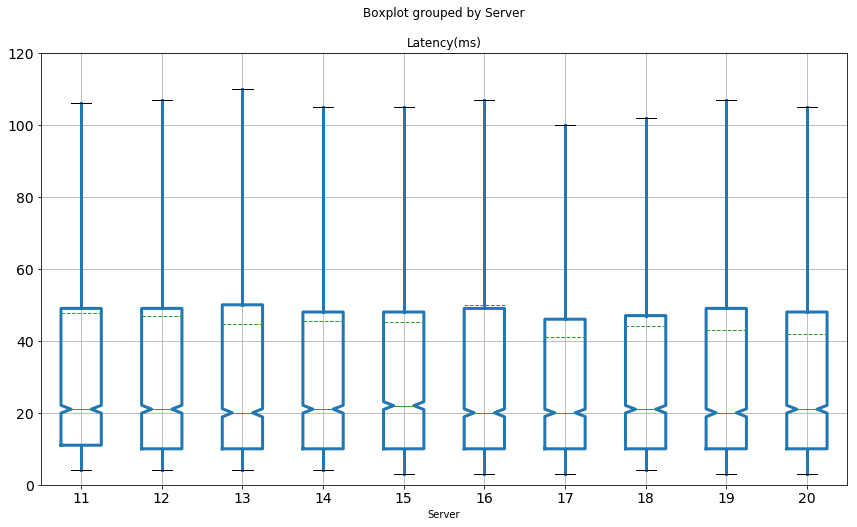

In [9]:
ax = df.boxplot(column='Latency(ms)', by='Server', figsize=(14, 8),
                showfliers=False, showmeans=True, meanline=True, notch=True,
                fontsize=14,
                boxprops= dict(linewidth=3.0, color='black'),
                whiskerprops=dict(linewidth=3.0, color='black'),
               )
ax.set_ylim(0, 120)
plt.show()

In [10]:
df.groupby('Server').mean()['Latency(ms)']

Server
11    47.745072
12    46.864446
13    44.598152
14    45.556326
15    45.100264
16    49.824179
17    41.160789
18    44.012334
19    43.010735
20    41.962842
Name: Latency(ms), dtype: float64

In [11]:
df['Latency(ms)'].mean()

44.976437477501065

In [12]:
df['Latency(ms)'].max()

1403

In [13]:
df['Latency(ms)'].min()

3

# Since July 2019

In [14]:
df[df.Month >= 7]["Latency(ms)"].mean()

14.547571007294739

In [15]:
df[df.Month >= 7]["Latency(ms)"].min()

8

In [16]:
df[df.Month >= 7]["Latency(ms)"].max()

246

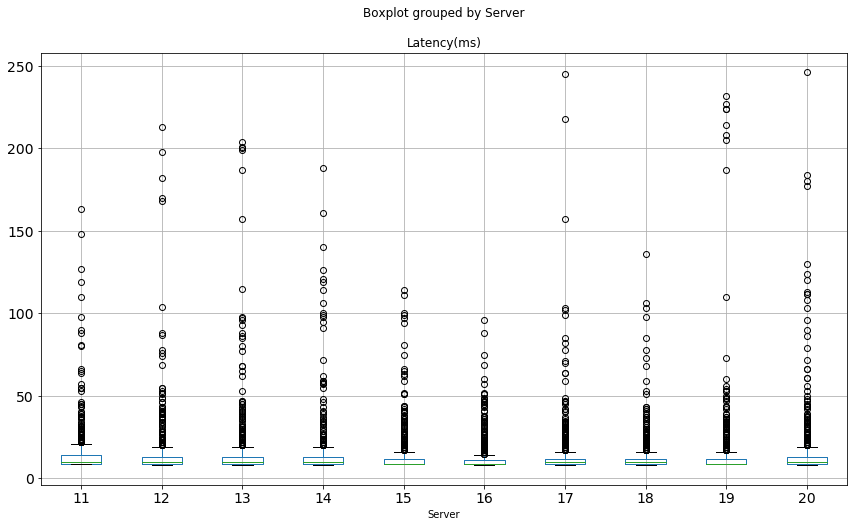

In [17]:
ax = df[df.Month >= 7].boxplot(column='Latency(ms)', by='Server', figsize=(14, 8), fontsize=14)
plt.show()